## <center>Create 3D animation from matplotlib figures</center>
#### ffmpeg installation process:
follow these steps in this [link](https://www.wikihow.com/Install-FFmpeg-on-Windows)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from mpl_toolkits.mplot3d import axes3d
from msdlib.dataset import solinoid_data

In [2]:
data_len = 10000
ys = 3
sol_data = solinoid_data(data_len, ys)

In [3]:
def plot_3d_graph(changable, data_source, fig, ys):
    rng = changable[0]
    angle = changable[1]
    
    ax1 = fig.add_subplot(2, 2, 1, projection = '3d')
    ax2 = fig.add_subplot(2, 2, 2)
    ax3 = fig.add_subplot(2, 2, 3)
    ax4 = fig.add_subplot(2, 2, 4)
    x = data_source['x'].iloc[:rng[1]]
    z = data_source['z'].iloc[:rng[1]]
    colors = ['darkcyan', 'coral', 'purple', 'limegreen', 'crimson', 'khaki', 'magenta', 'darkslategrey',
              'blue', 'darkgreen']
    for i in range(ys):
        y = data_source['y_%02d'%i].iloc[:rng[1]]
        for k, ax in enumerate([ax1, ax2, ax3, ax4]):
            if k == 0:
                ax.plot(x, y, z, color = colors[i])
                if i == ys - 1:
                    ax.set_xlabel('x-axis')
                    ax.set_ylabel('y-axis')
                    ax.set_zlabel('z-axis')
                    ax.view_init(angle[0], angle[1])
            elif k == 1:
                ax.plot(x, y, color = colors[i])
                if i == ys - 1:
                    ax.set_xlabel('x-axis')
                    ax.set_ylabel('y-axis')
            elif k == 2:
                ax.plot(x, z, color = colors[i])
                if i == ys - 1:
                    ax.set_xlabel('x-axis')
                    ax.set_ylabel('z-axis')
            elif k == 3:
                ax.plot(y, z, color = colors[i])
                if i == ys - 1:
                    ax.set_xlabel('y-axis')
                    ax.set_ylabel('z-axis')

In [4]:
frames = [[[i * 100, (i + 1) * 100], [10+i/1.2, 30 + i/1.2]] for i in range(int(data_len/100))]
frames

[[[0, 100], [10.0, 30.0]],
 [[100, 200], [10.833333333333334, 30.833333333333332]],
 [[200, 300], [11.666666666666666, 31.666666666666668]],
 [[300, 400], [12.5, 32.5]],
 [[400, 500], [13.333333333333334, 33.333333333333336]],
 [[500, 600], [14.166666666666668, 34.166666666666664]],
 [[600, 700], [15.0, 35.0]],
 [[700, 800], [15.833333333333334, 35.833333333333336]],
 [[800, 900], [16.666666666666668, 36.666666666666664]],
 [[900, 1000], [17.5, 37.5]],
 [[1000, 1100], [18.333333333333336, 38.333333333333336]],
 [[1100, 1200], [19.166666666666668, 39.16666666666667]],
 [[1200, 1300], [20.0, 40.0]],
 [[1300, 1400], [20.833333333333336, 40.833333333333336]],
 [[1400, 1500], [21.666666666666668, 41.66666666666667]],
 [[1500, 1600], [22.5, 42.5]],
 [[1600, 1700], [23.333333333333336, 43.333333333333336]],
 [[1700, 1800], [24.166666666666668, 44.16666666666667]],
 [[1800, 1900], [25.0, 45.0]],
 [[1900, 2000], [25.833333333333336, 45.833333333333336]],
 [[2000, 2100], [26.666666666666668, 46.

In [5]:
title = '3D animation with subplot function using matplotlib\nx = cosine,   y = sine,   z = linear points(0, 50)'

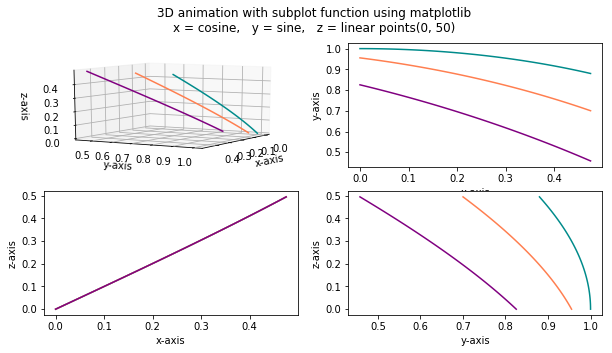

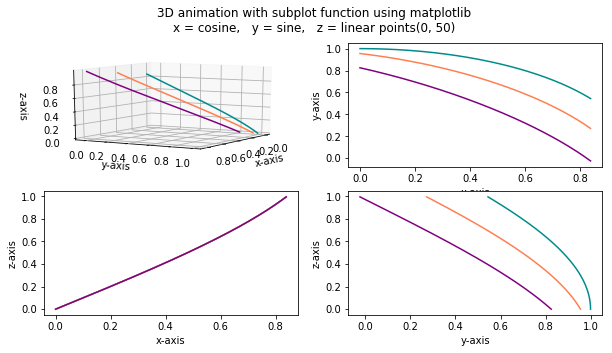

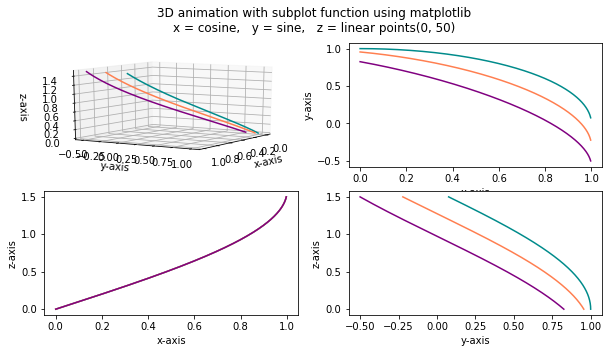

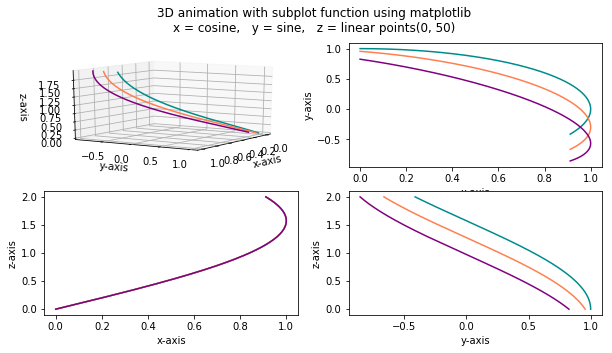

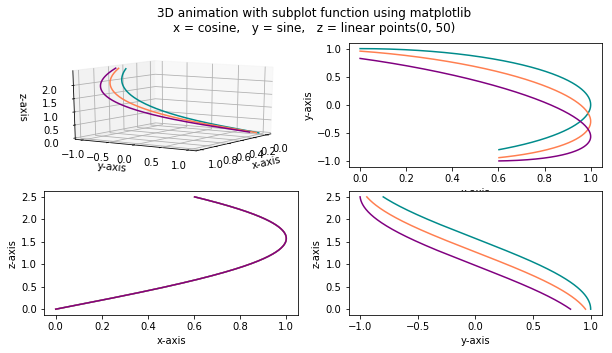

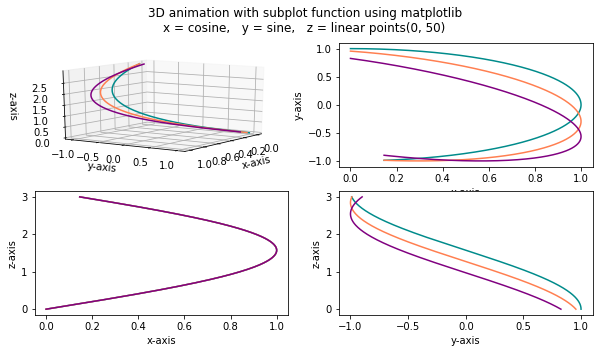

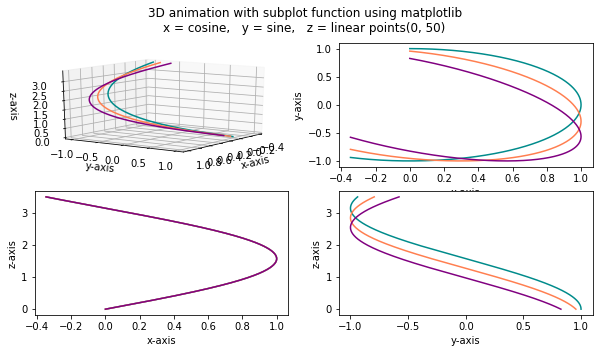

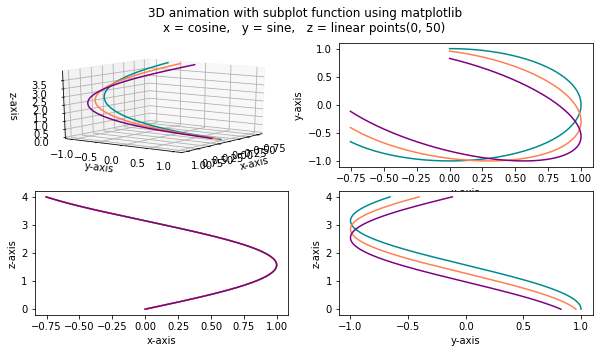

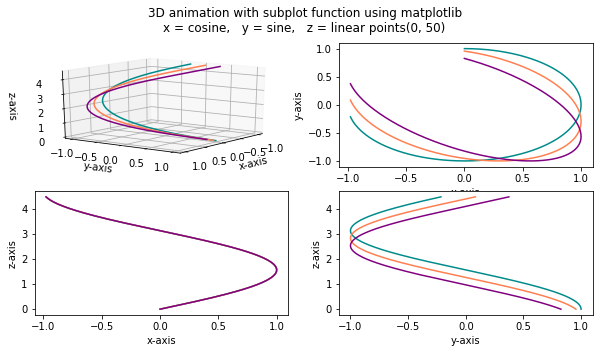

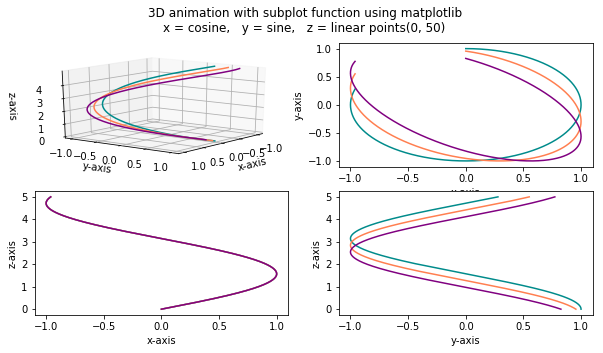

In [6]:
%matplotlib inline
for i in range(10):
    fig = plt.figure(figsize = (10, 5))
    fig.suptitle(title)
    plot_3d_graph(frames[i], sol_data, fig, ys)
    plt.show()

<IPython.core.display.Javascript object>


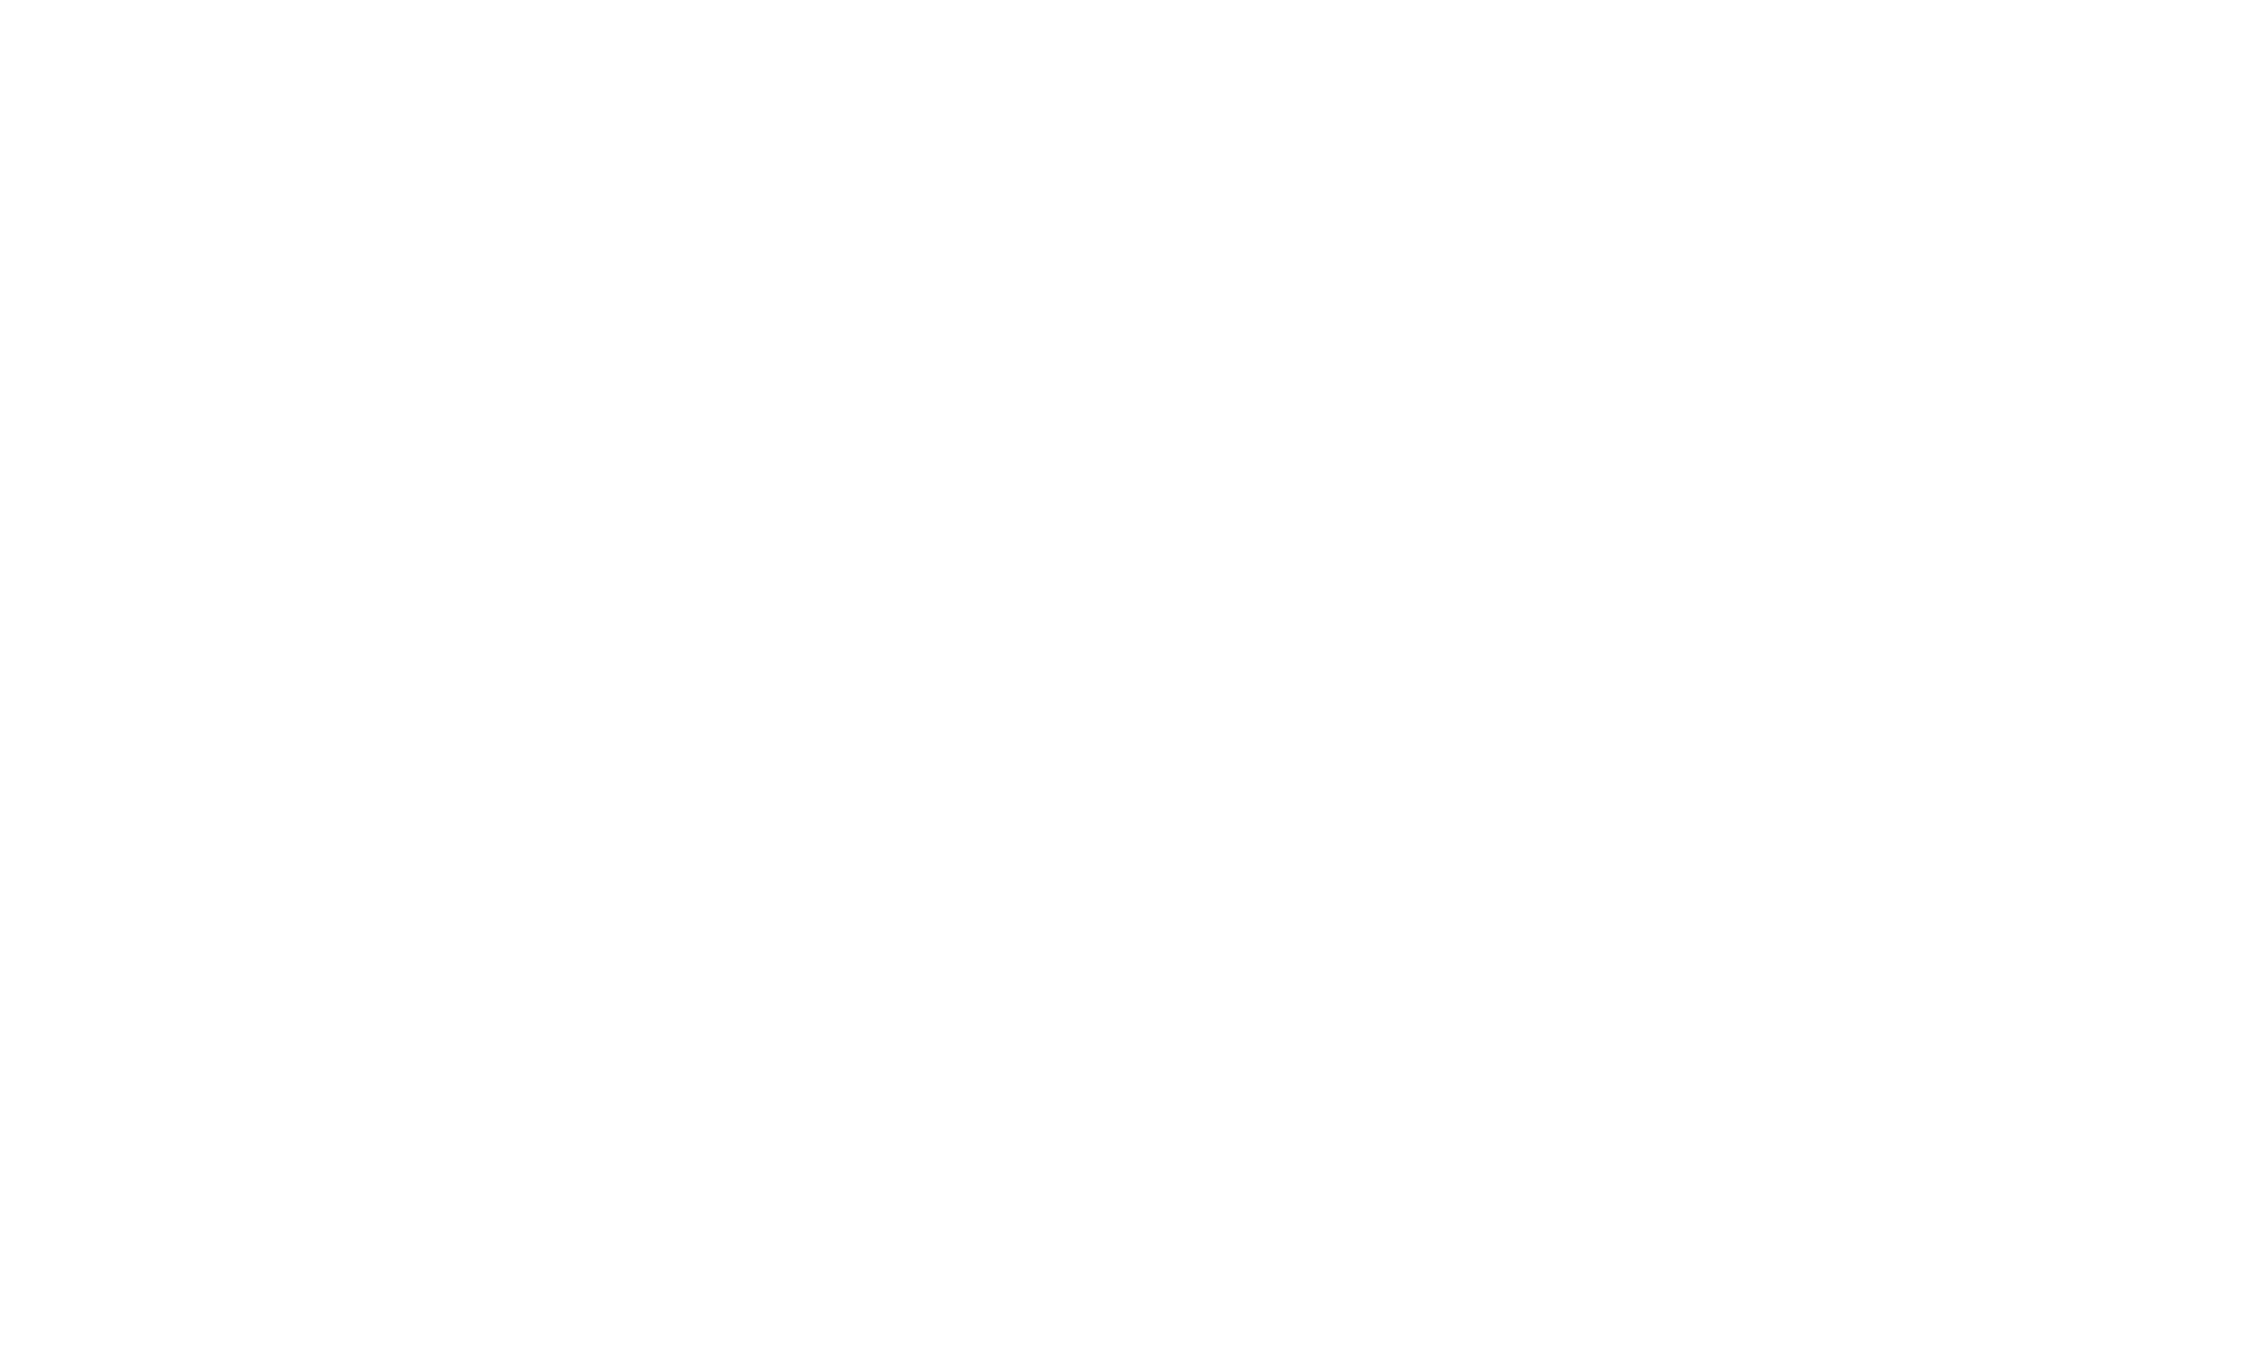

C:\Users\abdul\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<IPython.core.display.Javascript object>


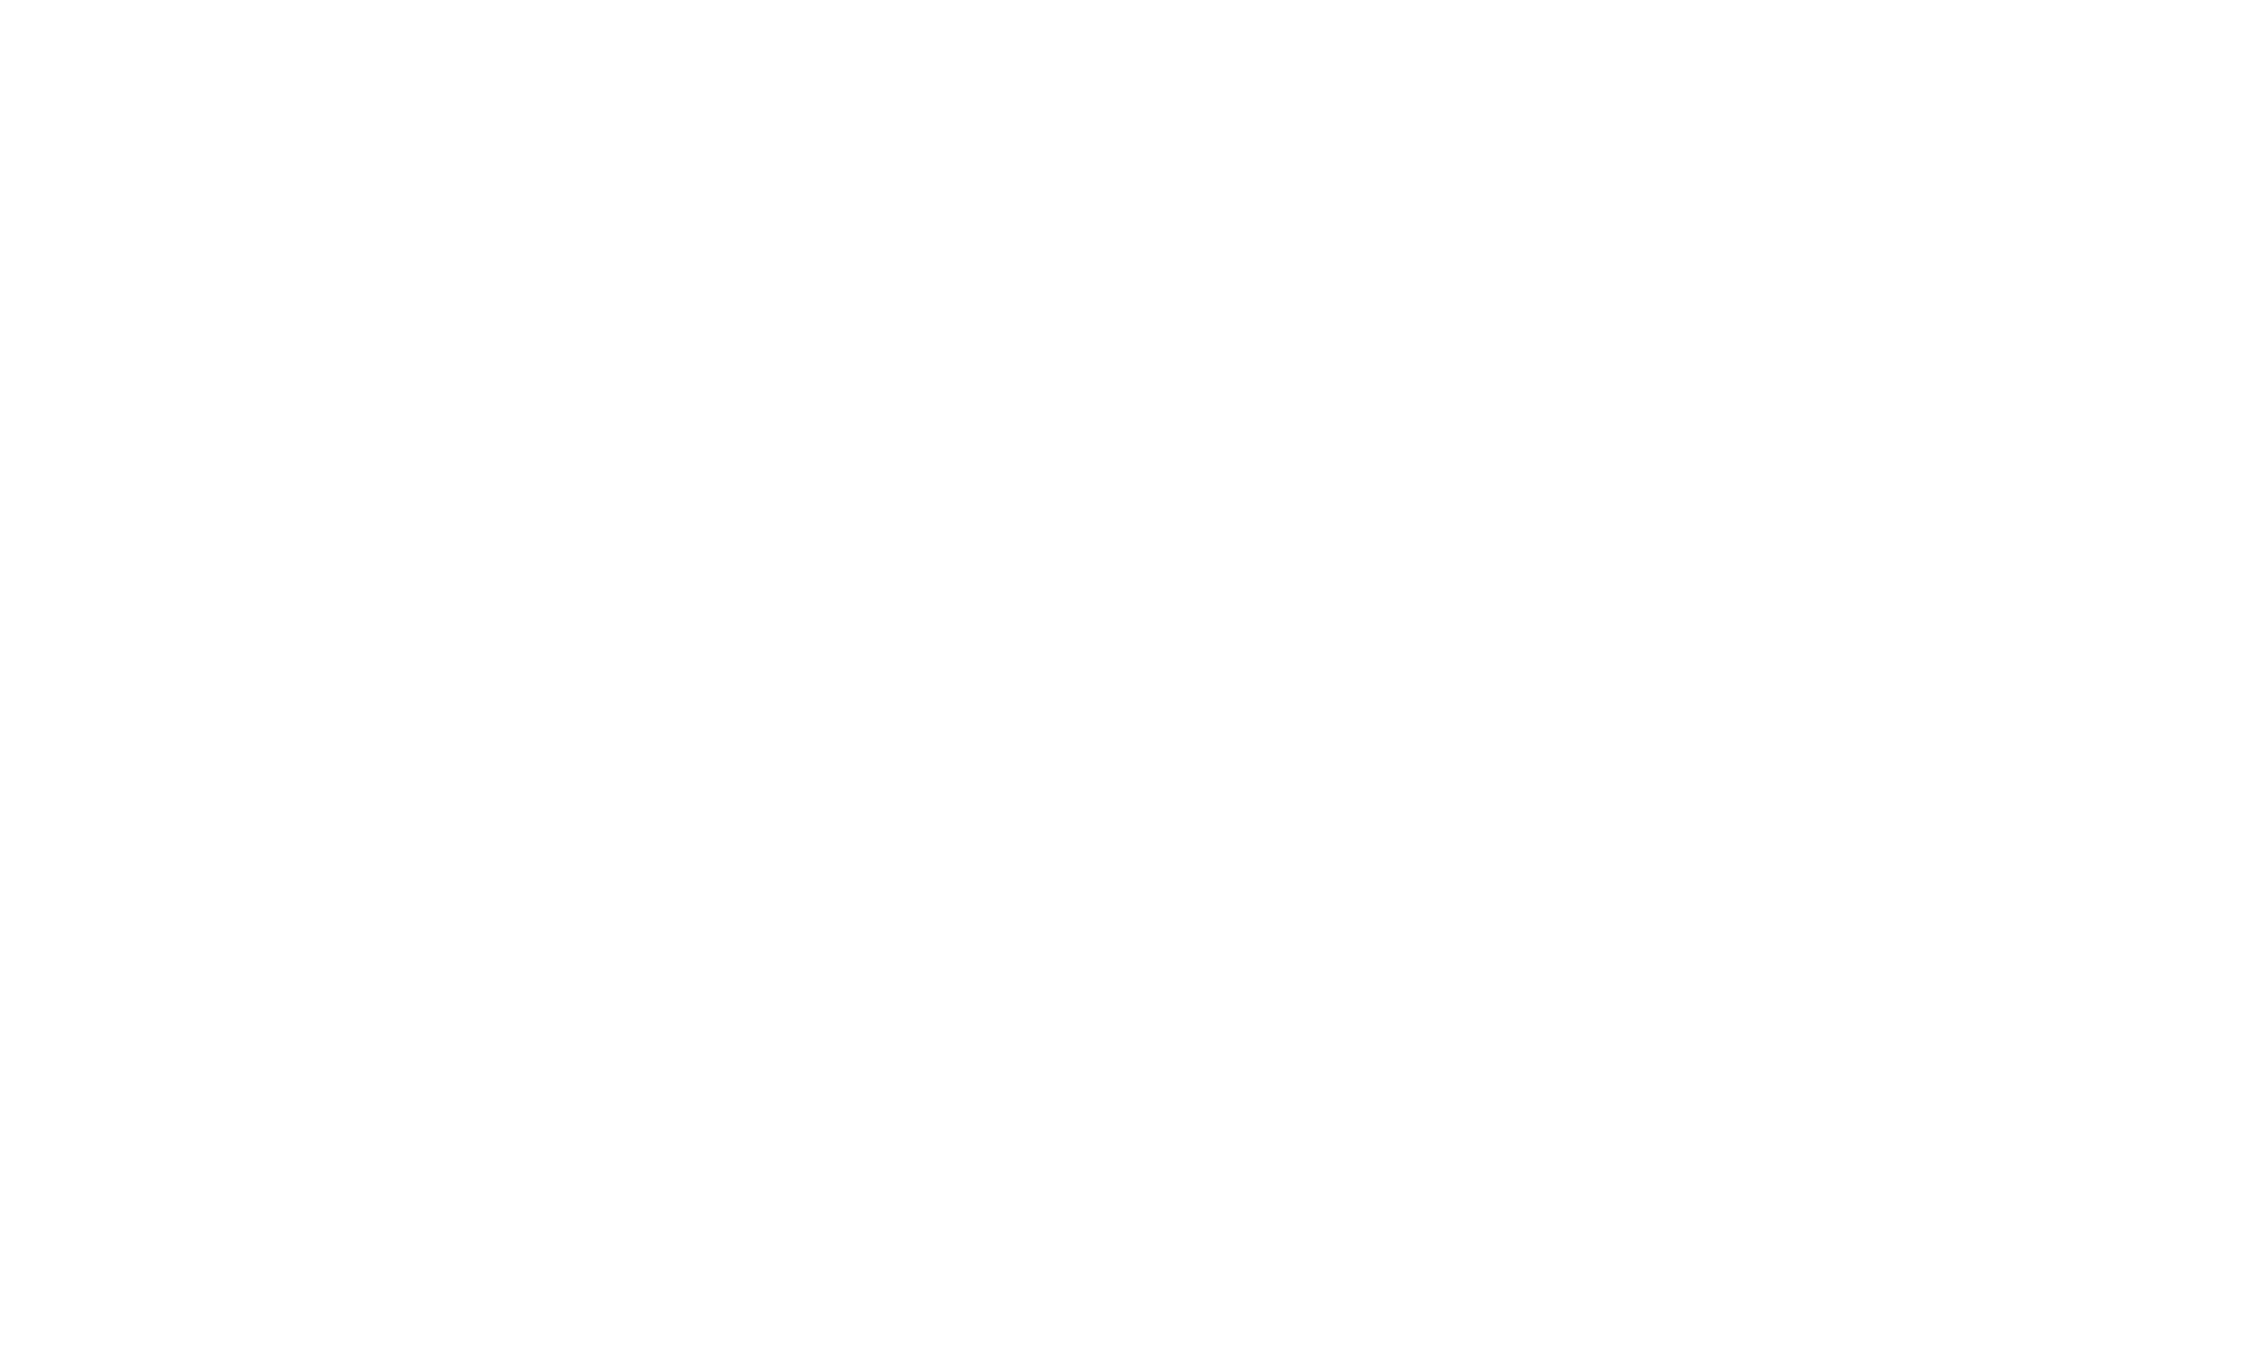

Traceback (most recent call last):
  File "C:\Users\abdul\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\abdul\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [7]:
%matplotlib notebook
fig = plt.figure(figsize = (25, 15))
fig.suptitle(title)
anim = FuncAnimation(fig = fig, func = plot_3d_graph, frames = frames,
                     fargs = (sol_data, fig, ys), repeat = False, blit = False)
writer = animation.FFMpegWriter(fps=10, metadata = {'title' : 'Create 3D animation from matplotlib figures',
                                                  'Author' : 'abdullah al masud'})
anim.save('solinoid(multiple)_animation.mp4', writer = writer)